<a href="https://colab.research.google.com/github/aldiansyahali/Data/blob/main/Kelompok_3_face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

kaggle dataset download

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:08<00:00, 25.0MB/s]
100% 163M/163M [00:08<00:00, 20.8MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2489.jpg', 'with_mask_1587.jpg', 'with_mask_2695.jpg', 'with_mask_877.jpg', 'with_mask_2167.jpg']
['with_mask_1577.jpg', 'with_mask_1172.jpg', 'with_mask_2014.jpg', 'with_mask_1554.jpg', 'with_mask_549.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1039.jpg', 'without_mask_239.jpg', 'without_mask_3040.jpg', 'without_mask_1821.jpg', 'without_mask_2698.jpg']
['without_mask_3109.jpg', 'without_mask_2718.jpg', 'without_mask_2910.jpg', 'without_mask_1397.jpg', 'without_mask_630.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

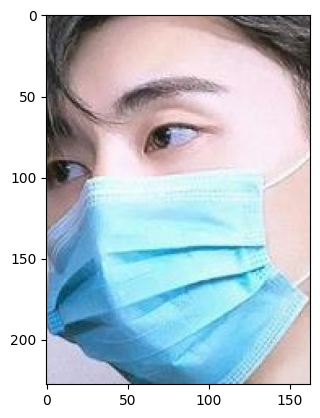

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

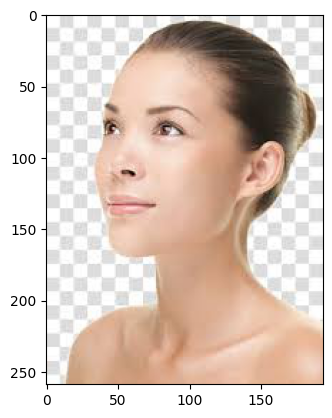

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[214, 166, 128],
        [215, 165, 128],
        [214, 164, 126],
        ...,
        [217, 222, 222],
        [170, 174, 175],
        [205, 207, 208]],

       [[214, 166, 128],
        [215, 165, 128],
        [214, 164, 126],
        ...,
        [166, 171, 172],
        [217, 220, 221],
        [176, 178, 180]],

       [[214, 166, 128],
        [214, 166, 128],
        [213, 165, 126],
        ...,
        [156, 161, 162],
        [178, 182, 183],
        [223, 225, 226]],

       ...,

       [[ 44,  46,  57],
        [ 79,  81,  94],
        [ 85,  87, 103],
        ...,
        [127, 134, 162],
        [128, 135, 163],
        [119, 126, 154]],

       [[ 40,  42,  52],
        [ 67,  69,  82],
        [ 90,  92, 108],
        ...,
        [135, 142, 171],
        [130, 137, 166],
        [118, 126, 155]],

       [[ 36,  38,  48],
        [ 65,  67,  80],
        [ 87,  90, 106],
        ...,
        [122, 129, 159],
        [140, 147, 176],
        [131, 140, 169]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[105, 104, 105],
        [ 97,  96,  96],
        [ 96,  96,  96],
        ...,
        [ 61,  71,  68],
        [ 62,  71,  68],
        [ 63,  70,  69]],

       [[102, 103, 102],
        [ 96,  96,  96],
        [ 99,  97,  98],
        ...,
        [ 51,  59,  58],
        [ 52,  59,  58],
        [ 52,  58,  59]],

       [[102, 102, 102],
        [101, 101, 101],
        [ 94,  91,  92],
        ...,
        [ 41,  46,  48],
        [ 40,  45,  48],
        [ 39,  46,  48]],

       ...,

       [[105, 211, 239],
        [ 88, 192, 213],
        [ 60,  84,  87],
        ...,
        [116, 133, 130],
        [116, 132, 129],
        [115, 131, 129]],

       [[ 95, 197, 220],
        [ 65, 103, 105],
        [ 75,  57,  49],
        ...,
        [116, 134, 130],
        [116, 133, 129],
        [117, 132, 129]],

       [[ 72, 121, 129],
        [ 68,  54,  48],
        [113,  95,  88],
        ...,
        [118, 136, 132],
        [119, 134, 130],
        [116, 133, 129]]

In [ ]:
X_train_scaled[0]

array([[[0.41176471, 0.40784314, 0.41176471],
        [0.38039216, 0.37647059, 0.37647059],
        [0.37647059, 0.37647059, 0.37647059],
        ...,
        [0.23921569, 0.27843137, 0.26666667],
        [0.24313725, 0.27843137, 0.26666667],
        [0.24705882, 0.2745098 , 0.27058824]],

       [[0.4       , 0.40392157, 0.4       ],
        [0.37647059, 0.37647059, 0.37647059],
        [0.38823529, 0.38039216, 0.38431373],
        ...,
        [0.2       , 0.23137255, 0.22745098],
        [0.20392157, 0.23137255, 0.22745098],
        [0.20392157, 0.22745098, 0.23137255]],

       [[0.4       , 0.4       , 0.4       ],
        [0.39607843, 0.39607843, 0.39607843],
        [0.36862745, 0.35686275, 0.36078431],
        ...,
        [0.16078431, 0.18039216, 0.18823529],
        [0.15686275, 0.17647059, 0.18823529],
        [0.15294118, 0.18039216, 0.18823529]],

       ...,

       [[0.41176471, 0.82745098, 0.9372549 ],
        [0.34509804, 0.75294118, 0.83529412],
        [0.23529412, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
170/170 [==============================] - 17s 24ms/step - loss: 0.4370 - acc: 0.8104 - val_loss: 0.3308 - val_acc: 0.8512
Epoch 2/20
170/170 [==============================] - 3s 18ms/step - loss: 0.2612 - acc: 0.8957 - val_loss: 0.2848 - val_acc: 0.8579
Epoch 3/20
170/170 [==============================] - 3s 18ms/step - loss: 0.2196 - acc: 0.9137 - val_loss: 0.2256 - val_acc: 0.9091
Epoch 4/20
170/170 [==============================] - 3s 18ms/step - loss: 0.1709 - acc: 0.9303 - val_loss: 0.2311 - val_acc: 0.8975
Epoch 5/20
170/170 [==============================] - 3s 18ms/step - loss: 0.1430 - acc: 0.9457 - val_loss: 0.2463 - val_acc: 0.9223
Epoch 6/20
170/170 [==============================] - 3s 18ms/step - loss: 0.1137 - acc: 0.9595 - val_loss: 0.2318 - val_acc: 0.9240
Epoch 7/20
170/170 [==============================] - 3s 18ms/step - loss: 0.0990 - acc: 0.9636 - val_loss: 0.2977 - val_acc: 0.9223
Epoch 8/20
170/170 [==============================] - 3s 19ms/step -

**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 13ms/step - loss: 0.4249 - acc: 0.9325
Test Accuracy = 0.9324950575828552


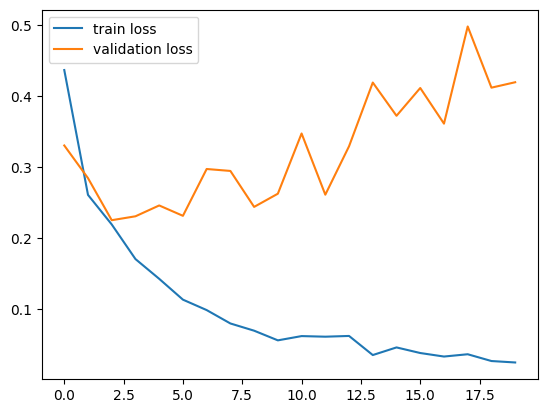

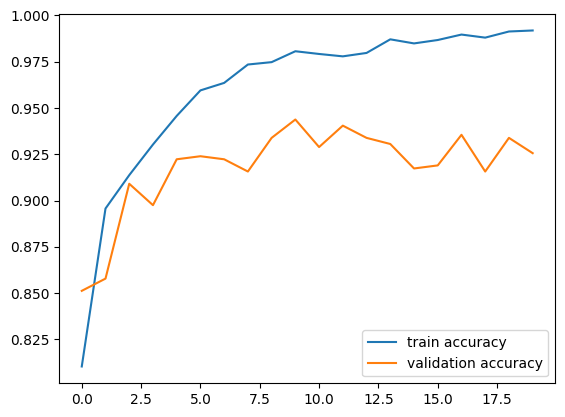

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/fahrul.png


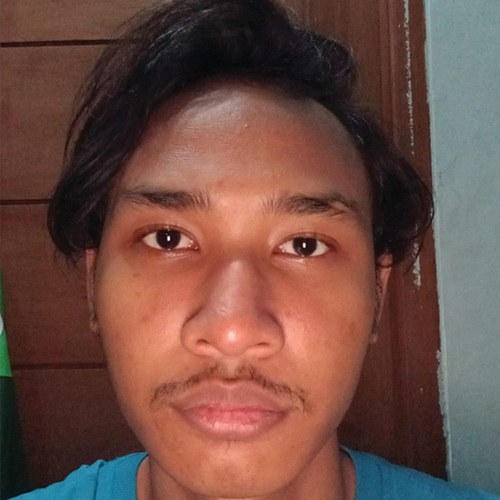

1/1 [==============================] - 0s 212ms/step
[[0.03318782 0.98259926]]
1
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')

Path of the image to be predicted: /content/testblur3.png


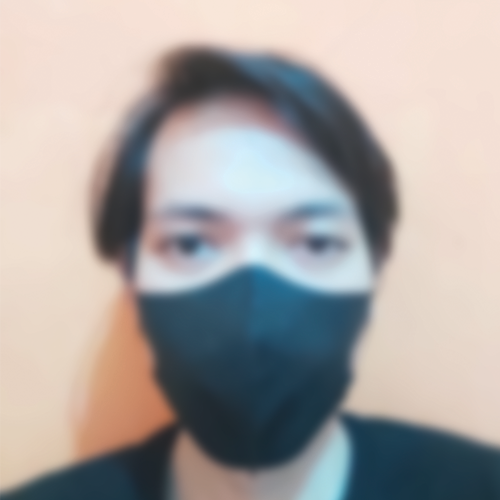

1/1 [==============================] - 0s 32ms/step
[[0.78189266 0.36098555]]
0
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')

Path of the image to be predicted: /content/testblur3.png


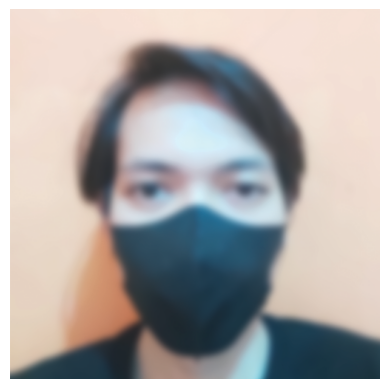

1/1 [==============================] - 0s 22ms/step
[[0.79544395 0.34593186]]
0
The person in the image is wearing a mask


In [ ]:
# Get the path of the image to be predicted
input_image_path = input('Path of the image to be predicted: ')

# Read the input image
input_image = cv2.imread(input_image_path)

# Convert the image from BGR to RGB for correct display with matplotlib
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Display the original input image
plt.imshow(input_image_rgb)
plt.axis('off')
plt.show()

# Apply Gaussian blur to reduce noise and enhance the image
blurred_image = cv2.GaussianBlur(input_image, (5, 5), 0)

input_image_resized = cv2.resize(blurred_image, (128, 128))
input_image_scaled = input_image_resized / 255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
    print('The person in the image is not wearing a mask')
else:
    print('The person in the image is wearing a mask')

Path of the image to be predicted: /content/testblur3.png


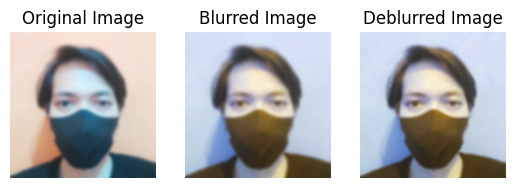

1/1 [==============================] - 0s 20ms/step
[[0.5796694 0.5700176]]
0
The person in the image is wearing a mask


In [ ]:
# Get the path of the image to be predicted
input_image_path = input('Path of the image to be predicted: ')

# Read the input image
input_image = cv2.imread(input_image_path)

# Convert the image from BGR to RGB for correct display with matplotlib
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Display the original input image
plt.subplot(1, 3, 1)
plt.imshow(input_image_rgb)
plt.axis('off')
plt.title('Original Image')

# Apply Gaussian blur to reduce noise and enhance the image
blurred_image = cv2.GaussianBlur(input_image, (5, 5), 0)

# Display the blurred image
plt.subplot(1, 3, 2)
plt.imshow(blurred_image)
plt.axis('off')
plt.title('Blurred Image')

# Perform unsharp masking to enhance the edges and details in the image
alpha = 10  # Adjust the alpha value based on the desired sharpening effect
sharpened_image = cv2.addWeighted(input_image, 1 + alpha, blurred_image, -alpha, 0)

# Display the deblurred (sharpened) image
plt.subplot(1, 3, 3)
plt.imshow(sharpened_image)
plt.axis('off')
plt.title('Deblurred Image')

plt.show()

input_image_resized = cv2.resize(sharpened_image, (128, 128))
input_image_scaled = input_image_resized / 255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
    print('The person in the image is not wearing a mask')
else:
    print('The person in the image is wearing a mask')